In [1]:
import pkg_resources
pkg_resources.require("numpy>=`1.20.1")  #  to use specific numpy version
import numpy as np
import rsnapsim as rss
import sys; from sys import platform
from skimage import io ; from skimage.io import imread; from skimage.measure import find_contours
from random import randrange
import os; from os import listdir; from os.path import isfile, join
import pandas as pd
import re
import shutil
from random import randrange
import pathlib
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image
# Plotting
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases','videos_for_sim_cell')
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')

In [3]:
# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [4]:
# gene files
gene_file_h2b = str(sequences_dir.joinpath('H2B_withTags.txt'))
gene_file_bact = str(sequences_dir.joinpath('Bactin_withTags.txt'))

In [5]:
list_files_names = sorted([f for f in listdir(video_dir) if isfile(join(video_dir, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_dir.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file

In [6]:
num_cell_shapes = len(path_files)
sel_shape = randrange(num_cell_shapes)
sel_shape = 0
video_path = path_files[sel_shape]

# Simulated Cell customization

In [7]:
# Inputs
inial_video = io.imread(video_path) # video with empty cell
list_gene_sequences = [gene_file_h2b, gene_file_bact] # path to gene sequences
list_number_spots = [20, 20] # list of integers, where each element represents the number of spots
list_target_channels = [1, 1] # channel where the simulated spots will be located. 
list_label_names = ['a','b'] # list of strings used to generate a classification field in the output data frame
list_elongation_rates = [3, 3] # list of elongation rates (aa/sec)
list_initation_rates = [0.1, 0.1] # list of initiation rates (1/sec)
frame_selection_empty_video = 'loop' # Options are: 'constant' , 'shuffle' and 'loop'
simulation_time_in_sec = 50
step_size_in_sec = 1
list_diffusion_coefficients =[1, 1] # diffusion coefficients for each gene

In [8]:
save_as_tif = 1 # option to save the simulated video
save_dataframe = 1 # option to save the simulation output as a dataframe in format csv. 
saved_file_name = 'simulated_cell' # if the video or dataframe are save, this variable assigns the name to the files
create_temp_folder = 1 # saves the video and data frame in a temp folder
save_as_gif = 1  # saves the video as .gif in a temp folder

In [9]:
tensor_video, dataframe_simulated_cell,list_ssa = rsp.SimulatedCellMultiplexing(inial_video,list_gene_sequences,list_number_spots,list_target_channels,list_diffusion_coefficients,list_label_names,list_elongation_rates,list_initation_rates,simulation_time_in_sec,step_size_in_sec,save_as_tif, save_dataframe, saved_file_name,create_temp_folder,cell_number =0,save_as_gif=save_as_gif,perform_video_augmentation=1,frame_selection_empty_video=frame_selection_empty_video).make_simulation()

The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp


In [17]:
#plt.rcParams['figure.figsize'] = [4,4]
#plt.imshow(tensor_video[5,:,:,1],cmap='gray')
#plt.show()

## Simulated data set

In [11]:
#dataframe_simulated_cell

## Plotting time courses for gene 1

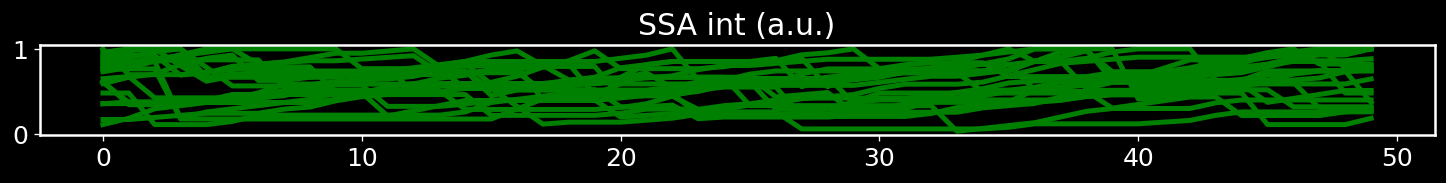

In [12]:
plt.figure(figsize=(15,1))
for tr in range(0,list_ssa[0].shape[0] ):
    plt.plot(list_ssa[0][tr,:]/np.amax(list_ssa[0][tr,:]) , '-',linewidth = 3,color='green');
plt.title('SSA int (a.u.)')
plt.show()

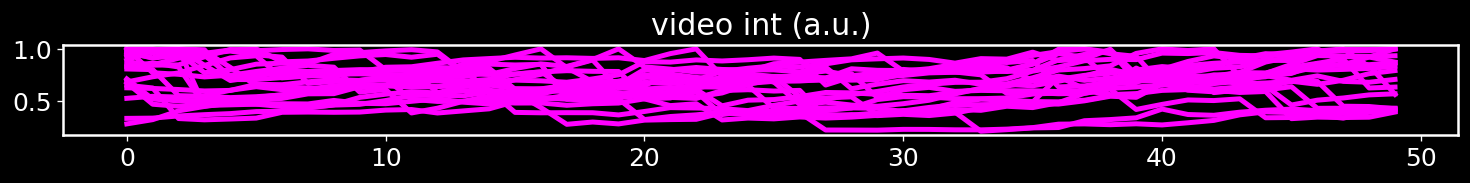

In [13]:
plt.figure(figsize=(15,1))
for i in range(0,len(list_gene_sequences)):
    for j in range (0,list_number_spots[i]):
        if i >0:
            spot_num_counter = j + list_number_spots[0]
        else:
            spot_num_counter = j
        sim_cell_int_traj = dataframe_simulated_cell.loc[(dataframe_simulated_cell['Classification']=='a') & (dataframe_simulated_cell['particle']==spot_num_counter)].green_int_mean.values[:]
        if sim_cell_int_traj.any():
            plt.plot (sim_cell_int_traj/np.amax(sim_cell_int_traj) ,linewidth = 3,color='magenta' )      
plt.title('video int (a.u.)')
plt.show()

## Plotting time courses for gene 2

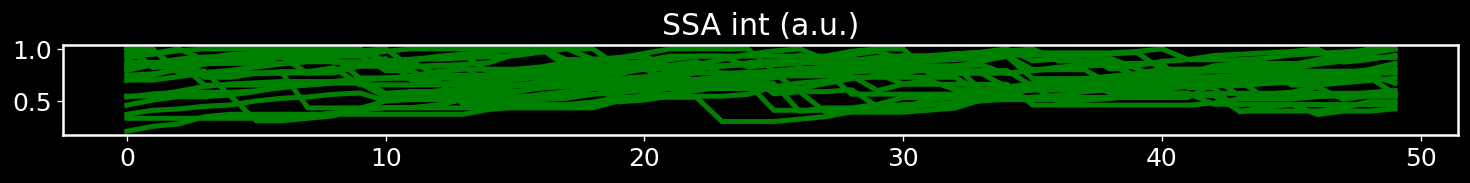

In [14]:
plt.figure(figsize=(15,1))
for tr in range(0,list_ssa[1].shape[0] ):
    plt.plot(list_ssa[1][tr,:]/np.amax(list_ssa[1][tr,:] ) , '-',linewidth = 3,color='green');
plt.title('SSA int (a.u.)')
plt.show()

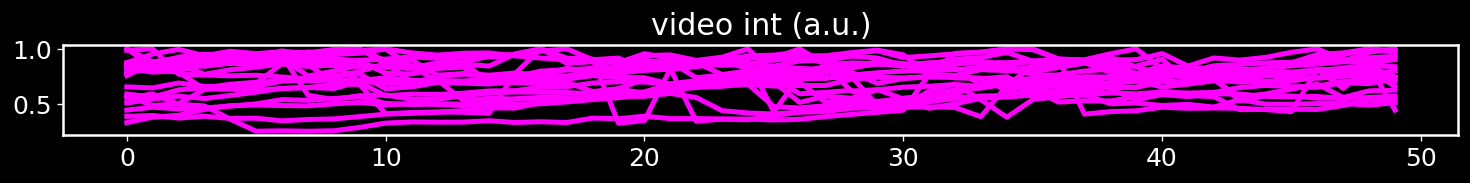

In [15]:
plt.figure(figsize=(15,1))
for i in range(0,len(list_gene_sequences)):
    for j in range (0,list_number_spots[i]):
        if i >0:
            spot_num_counter = j + list_number_spots[0] # this is just a counter for that creates the spot number based on list_number_spots
        else:
            spot_num_counter = j
        sim_cell_int_traj_b = dataframe_simulated_cell.loc[(dataframe_simulated_cell['Classification']=='b') &  (dataframe_simulated_cell['particle']==spot_num_counter)].green_int_mean.values[:]
        if sim_cell_int_traj_b.any():
            plt.plot (sim_cell_int_traj_b/np.amax(sim_cell_int_traj_b)  ,linewidth = 3,color='magenta' )   
plt.title('video int (a.u.)')
plt.show()

In [16]:
# Plot only selected trajectories
plt.rcParams['figure.figsize'] = [5,5]
controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,normalize=False,step_size_in_sec=step_size_in_sec).make_video_app()
display(VBox([controls_pr, output_pr]));